# Understanding Text Embeddings: From Words to Vectors

This notebook explores text embeddings, a fundamental concept in natural language processing. We'll investigate how computers understand semantic meaning by converting words and sentences into numerical vectors.

**What Are Embeddings?**
- Dense numerical representations of data in a continuous vector space
- Similar meanings are positioned close together 
- Relative positions capture semantic relationships

## 1. Setup and Installation

In [10]:
# Install the required packages
!uv pip install accelerate==1.6.0 sentence-transformers==4.0.2

Using Python 3.12.9 environment at: /workspaces/fundamentals-of-ai-engineering-principles-and-practical-applications-6026542/.venv
Audited 2 packages in 22ms


In [11]:
# Import libraries
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Set up matplotlib
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    try:
        plt.style.use('seaborn-whitegrid')  # Fallback for older versions
    except:
        pass  # Default style if neither is available
        
plt.rcParams['figure.figsize'] = (10, 7)
np.random.seed(42)  # For reproducibility

## 2. Loading an Embedding Model

We'll use the `all-MiniLM-L6-v2` model, which creates 384-dimensional embeddings and is optimized for semantic similarity tasks.

In [12]:
from sentence_transformers import SentenceTransformer
# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')
print(f"Model: all-MiniLM-L6-v2")
print(f"Embedding dimension: {model.get_sentence_embedding_dimension()}")

Model: all-MiniLM-L6-v2
Embedding dimension: 384


## 3. Creating and Examining Embeddings

Let's create embeddings for some example sentences grouped by topic.

In [13]:
# Example sentences grouped by topic
sentences = [
    # AI/ML related sentences
    "I love machine learning and artificial intelligence.",
    "AI and ML are fascinating fields of study.",
    
    # Weather related sentences
    "The weather is beautiful today.",
    "It's a sunny day with clear skies.",
    
    # Python related sentences
    "Python is my favorite programming language.",
    "I enjoy coding in Python for data analysis."
]

# Topic labels for visualization
topics = ['AI/ML', 'AI/ML', 'Weather', 'Weather', 'Python', 'Python']

# Display our sentences with their topics
for i, (sentence, topic) in enumerate(zip(sentences, topics)):
    print(f"Sentence {i+1} ({topic}): {sentence}")

Sentence 1 (AI/ML): I love machine learning and artificial intelligence.
Sentence 2 (AI/ML): AI and ML are fascinating fields of study.
Sentence 3 (Weather): The weather is beautiful today.
Sentence 4 (Weather): It's a sunny day with clear skies.
Sentence 5 (Python): Python is my favorite programming language.
Sentence 6 (Python): I enjoy coding in Python for data analysis.


In [14]:
# Create embeddings for our sentences
embeddings = model.encode(sentences)

# Display embedding information
print(f"Shape of each embedding: {embeddings[0].shape}")
print(f"Number of embeddings: {len(embeddings)}")

# Show a snippet of the first embedding
print(f"\nFirst 10 dimensions of first embedding: {embeddings[0][:10]}")
print(f"Min: {embeddings[0].min():.4f}, Max: {embeddings[0].max():.4f}, Mean: {embeddings[0].mean():.4f}")

Shape of each embedding: (384,)
Number of embeddings: 6

First 10 dimensions of first embedding: [-0.00239476 -0.07797179  0.0768146   0.00246213  0.06795019 -0.06487745
 -0.03318882  0.00960123  0.03197829  0.03624603]
Min: -0.1715, Max: 0.1487, Mean: 0.0017


## 4. Measuring Similarity with Cosine Similarity

**Cosine Similarity Explained:**
- Measures the cosine of the angle between two vectors
- Ranges from -1 (opposite) to 1 (identical)
- Higher values indicate greater semantic similarity

In [15]:
# Calculate cosine similarity between all pairs of embeddings
similarity_matrix = cosine_similarity(embeddings)

# Display the similarity matrix
print("Cosine Similarity Matrix:")
np.set_printoptions(precision=4, suppress=True)
print(similarity_matrix)

Cosine Similarity Matrix:
[[1.     0.6934 0.0295 0.0339 0.5063 0.4714]
 [0.6934 1.     0.0107 0.0368 0.2927 0.3494]
 [0.0295 0.0107 1.     0.6957 0.0592 0.0082]
 [0.0339 0.0368 0.6957 1.     0.0369 0.0168]
 [0.5063 0.2927 0.0592 0.0369 1.     0.7249]
 [0.4714 0.3494 0.0082 0.0168 0.7249 1.    ]]


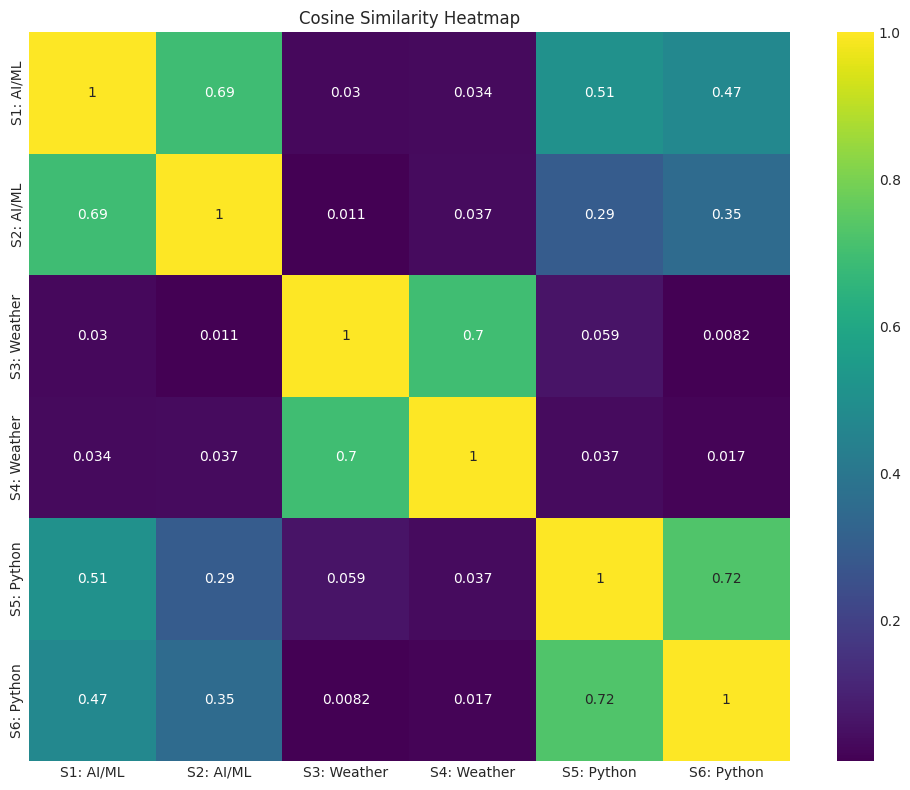

Heatmap Interpretation:
- The diagonal (1.0 values) shows each sentence's similarity with itself
- Brighter blocks show high similarity between sentences on the same topic
- Darker areas show lower similarity between sentences on different topics


In [16]:
# Create labels for our heatmap
labels = [f"S{i+1}: {topic}" for i, topic in enumerate(topics)]

# Create a heatmap of the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.title('Cosine Similarity Heatmap')
plt.tight_layout()
plt.show()

print("Heatmap Interpretation:")
print("- The diagonal (1.0 values) shows each sentence's similarity with itself")
print("- Brighter blocks show high similarity between sentences on the same topic")
print("- Darker areas show lower similarity between sentences on different topics")

## 5. Visualizing Embeddings in 2D Space

We'll use PCA to reduce our 384-dimensional embeddings to 2D for visualization.

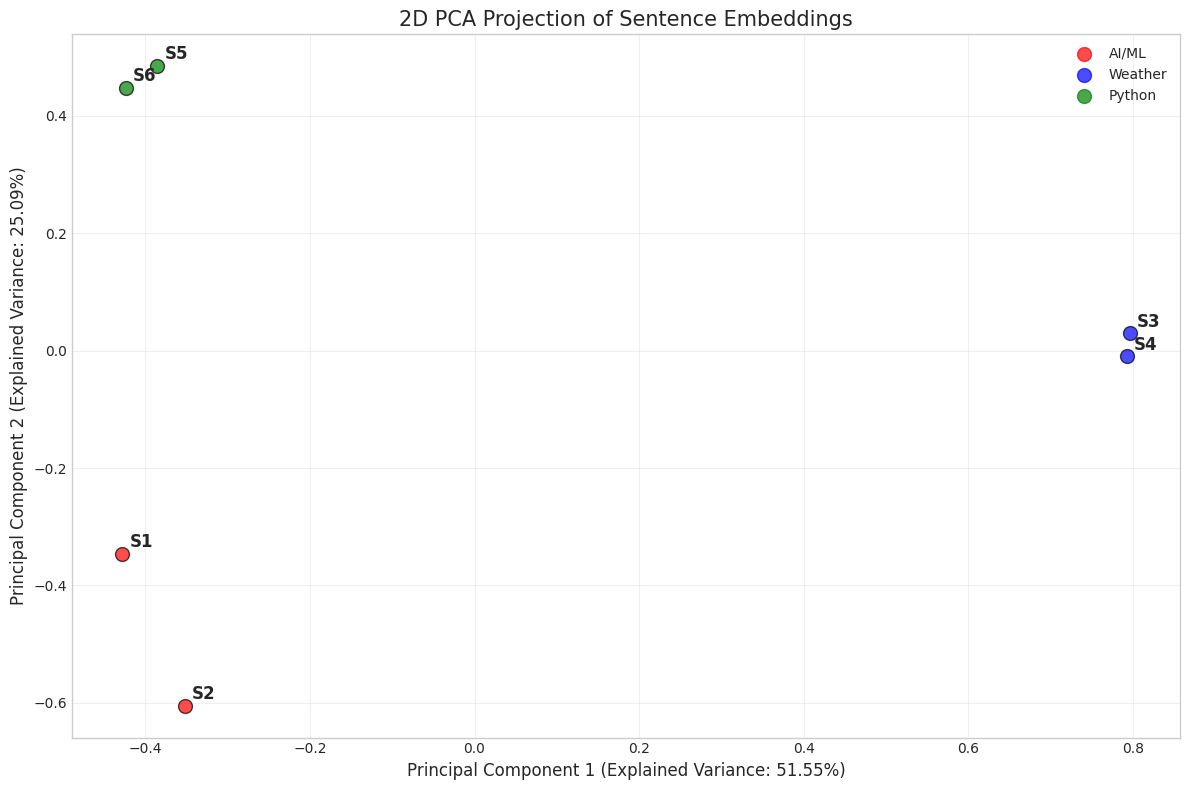

Notice how sentences on the same topic cluster together in the 2D space.
The two principal components capture 76.64% of the total variance.


In [17]:
# Reduce embeddings to 2 dimensions using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Set up colors for topics
topic_colors = {'AI/ML': 'red', 'Weather': 'blue', 'Python': 'green'}
colors = [topic_colors[topic] for topic in topics]

# Plot the 2D embeddings
plt.figure(figsize=(12, 8))
for i, (x, y) in enumerate(embeddings_2d):
    plt.scatter(x, y, c=colors[i], s=100, alpha=0.7, edgecolors='black')
    plt.annotate(f"S{i+1}", 
                xy=(x, y), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=12,
                weight='bold')

# Add a legend
for topic, color in topic_colors.items():
    plt.scatter([], [], c=color, label=topic, s=100, alpha=0.7)
plt.legend(loc='upper right')

# Add title and labels
plt.title('2D PCA Projection of Sentence Embeddings', fontsize=15)
plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})', fontsize=12)
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Notice how sentences on the same topic cluster together in the 2D space.")
print(f"The two principal components capture {sum(pca.explained_variance_ratio_):.2%} of the total variance.")

## 6. Testing with New Sentences

Let's see how our model handles new sentences related to our original topics.

In [18]:
# Define new sentences
new_sentences = [
    "Deep learning has revolutionized computer vision.",  # AI/ML related
    "The forecast predicts rain for tomorrow.",           # Weather related
    "NumPy and Pandas are essential Python libraries."    # Python related
]

# Create embeddings for the new sentences
new_embeddings = model.encode(new_sentences)

# Calculate similarity between new and original sentences
similarity_to_original = cosine_similarity(new_embeddings, embeddings)

# Find the most similar original sentence for each new sentence
for i, new_sent in enumerate(new_sentences):
    # Get index of most similar original sentence
    most_similar_idx = np.argmax(similarity_to_original[i])
    print(f"\nNew: \"{new_sent}\"")
    print(f"Most similar to: \"{sentences[most_similar_idx]}\"")
    print(f"Similarity score: {similarity_to_original[i][most_similar_idx]:.4f}")
    print(f"Topic: {topics[most_similar_idx]}")


New: "Deep learning has revolutionized computer vision."
Most similar to: "AI and ML are fascinating fields of study."
Similarity score: 0.4022
Topic: AI/ML

New: "The forecast predicts rain for tomorrow."
Most similar to: "The weather is beautiful today."
Similarity score: 0.4943
Topic: Weather

New: "NumPy and Pandas are essential Python libraries."
Most similar to: "I enjoy coding in Python for data analysis."
Similarity score: 0.6019
Topic: Python


## 7. Visualizing Original and New Sentences Together

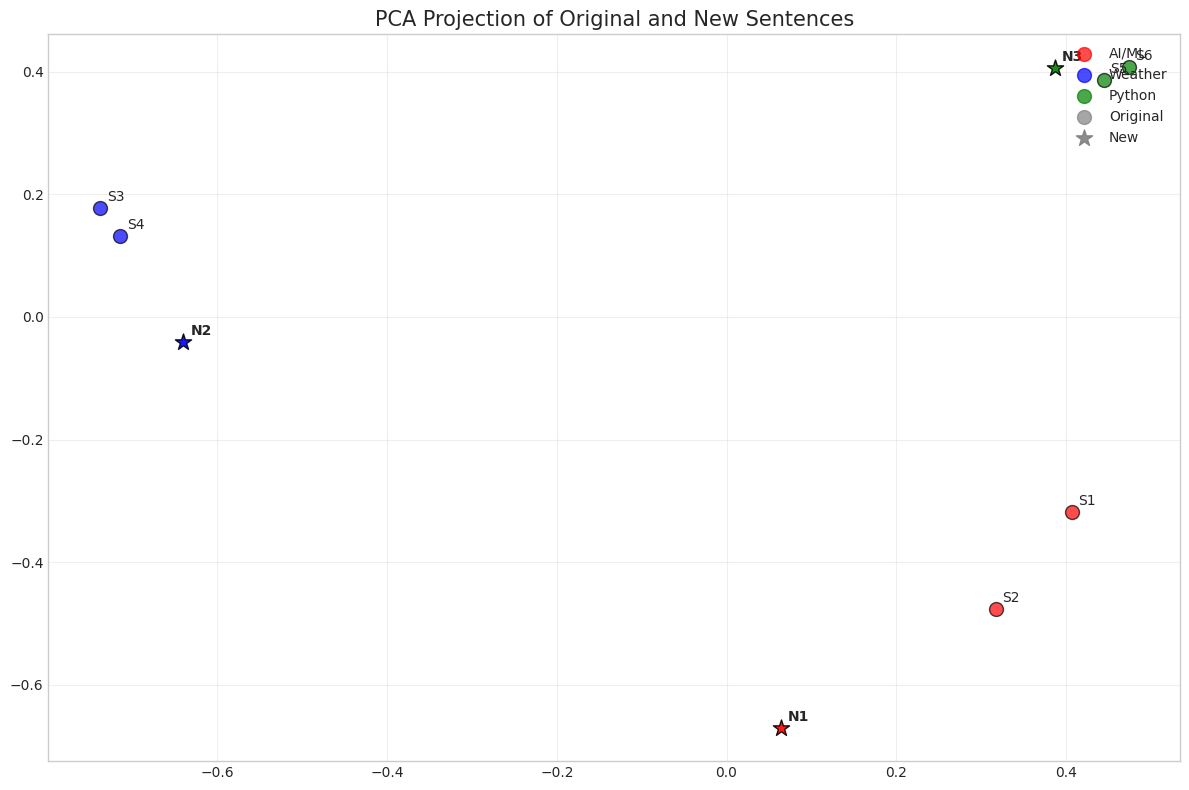

Notice how new sentences (stars) appear close to their semantically related original sentences.


In [19]:
# Combine original and new embeddings
all_embeddings = np.vstack([embeddings, new_embeddings])
all_topics = topics + ['AI/ML', 'Weather', 'Python']

# Project to 2D using PCA
pca = PCA(n_components=2)
all_embeddings_2d = pca.fit_transform(all_embeddings)

# Create visualization
plt.figure(figsize=(12, 8))

# Plot original sentences
for i in range(len(sentences)):
    x, y = all_embeddings_2d[i]
    plt.scatter(x, y, c=topic_colors[all_topics[i]], s=100, alpha=0.7, edgecolors='black')
    plt.annotate(f"S{i+1}", xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=10)

# Plot new sentences with star markers
for i in range(len(sentences), len(sentences) + len(new_sentences)):
    x, y = all_embeddings_2d[i]
    plt.scatter(x, y, c=topic_colors[all_topics[i]], s=150, alpha=0.9, marker='*', edgecolors='black')
    plt.annotate(f"N{i-len(sentences)+1}", xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=10, weight='bold')

# Add a legend
for topic, color in topic_colors.items():
    plt.scatter([], [], c=color, label=topic, s=100, alpha=0.7)
plt.scatter([], [], c='gray', marker='o', s=100, label='Original', alpha=0.7)
plt.scatter([], [], c='gray', marker='*', s=150, label='New', alpha=0.9)
plt.legend(loc='upper right')

plt.title('PCA Projection of Original and New Sentences', fontsize=15)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Notice how new sentences (stars) appear close to their semantically related original sentences.")

## 8. Real-World Applications of Embeddings

Embeddings power many modern AI applications including:

1. **Semantic Search**: Finding documents based on meaning rather than just keywords
2. **Document Clustering**: Automatically grouping similar documents
3. **Recommendation Systems**: Suggesting similar items based on semantic content
4. **Question Answering**: Finding relevant information to answer queries
5. **Retrieval Augmented Generation (RAG)**: Combining LLMs with knowledge bases using embeddings

## Conclusion

In this notebook, we've explored the fundamentals of text embeddings:
- How embeddings represent text as numerical vectors capturing semantic meaning
- Using cosine similarity to measure semantic relationships
- Visualizing high-dimensional embeddings in 2D space
- Testing embedding models with new sentences

Embeddings serve as the bridge between human language and machine understanding, forming the foundation of many modern NLP systems.